## 問題50

In [16]:
!rm NewsAggregatorDataset.zip
!wget --no-check-certificate -q "https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip"
!unzip -n NewsAggregatorDataset.zip
!rm -rf __MACOSX
!pip install stemming
!pip install spacy
!pip install numpy

Archive:  NewsAggregatorDataset.zip
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: __MACOSX/._readme.txt   


In [17]:
import random
import spacy
from stemming.porter2 import stem

class Corpora:
    def __init__(self,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP):
        self.id=ID
        self.title=TITLE
        self.url=URL
        self.publisher=PUBLISHER
        self.category=CATEGORY
        self.story=STORY
        self.hostname=HOSTNAME
        self.timestamp=TIMESTAMP
        self.feature_unigram=[]
    
    def get_str(self):
        sentence=str(self.id)+"\t"+str(self.title)+"\t"+str(self.url)+"\t"+str(self.publisher)+"\t"+str(self.category)+"\t"+str(self.story)+"\t"+str(self.hostname)+"\t"+str(self.timestamp)
        return sentence
    def get_publisher(self):
        return self.publisher
    def get_category(self):
        return self.category
    def get_feature(self):
        return self.feature_unigram
    def get_title(self):
        return self.title
    def set_unigram(self,library,nlp):
        word_dic={}
        for word in nlp.make_doc(self.title):
            tmp=stem(word.lemma_.lower())
            word_dic.setdefault(tmp,0)
            word_dic[tmp]+=1
        for word in library:
            if word in word_dic.keys():
                self.feature_unigram.append(word_dic[word])
            else:
                self.feature_unigram.append(0)
                
nlp=spacy.load('en')
corporas=[]
corporas_part=[]
corporas_train=[]
corporas_valid=[]
corporas_test=[]
with open("newsCorpora.csv",encoding='utf-8') as f:
    for line in f.readlines():
        line=line.split("\t")
        corpora=Corpora(line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[7])
        corporas.append(corpora)
    
for corpora in corporas:
    if corpora.get_publisher() in {"Reuters","Huffington Post","Businessweek","Contactmusic.com","Daily Mail"}:
        corporas_part.append(corpora)
random.shuffle(corporas_part)

with open('train.txt','w',encoding='utf-8',newline='\n') as train,\
    open('valid.txt','w',encoding='utf-8',newline='\n') as valid,\
        open('test.txt','w',encoding='utf-8',newline='\n') as test:
    for i,corpora in enumerate(corporas_part):
        if i < len(corporas_part)*0.8:
            corporas_train.append(corpora)
            train.write(corpora.get_str())
        elif i < len(corporas_part)*0.9:
            corporas_valid.append(corpora)
            valid.write(corpora.get_str())
        else:
            corporas_test.append(corpora)
            test.write(corpora.get_str())

def category_len(corpora_list):
    b_count=0
    t_count=0
    e_count=0
    m_count=0
    for line in corpora_list:
        if line.get_category()=='b':
            b_count+=1
        elif line.get_category()=='t':
            t_count+=1
        elif line.get_category()=='e':
            e_count+=1
        elif line.get_category()=='m':
            m_count+=1
    return [b_count,t_count,e_count,m_count]
    
print('train:')
print(category_len(corporas_train))
print("valid:")
print(category_len(corporas_valid))
print('test:')
print(category_len(corporas_test))

train:
[4476, 1228, 4254, 727]
valid:
[572, 145, 531, 88]
test:
[579, 152, 509, 95]


## 問題51

In [18]:
import re
def create_text_word_dic(corporas_list,nlp):
    word_dic={}
    for corpora in corporas_list:
        for word in nlp.make_doc(corpora.get_title()):
            tmp=stem(word.lemma_.lower())
            word_dic.setdefault(tmp,0)
            word_dic[tmp]+=1
    word_dic2={}
    for key,value in word_dic.items():
        if 2<value:
            word_dic2.setdefault(key,value)
    return word_dic2

library=[]
for word in create_text_word_dic(corporas_train,nlp):
    library.append(word)
print(len(library))
for corpora in corporas_train:
    corpora.set_unigram(library,nlp)
for corpora in corporas_valid:
    corpora.set_unigram(library,nlp)
for corpora in corporas_test:
    corpora.set_unigram(library,nlp)

def create_feature_file(fname,corporas):
    with open(fname,'w',encoding='utf-8',newline='\n') as f:
        for corpora in corporas:
            f.write(corpora.get_category()+":"+str(corpora.get_feature())+"\n")

create_feature_file('train.feature.txt',corporas_train)
create_feature_file('valid.feature.txt',corporas_valid)
create_feature_file('test.feature.txt',corporas_test)

with open('train.feature.txt','r') as f:
    for line in f.readlines()[:1:]:
        print(line,end="")

4815
b:[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 問題52

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
features_train=[]
category_train=[]
for corpora in corporas_train:
    features_train.append(corpora.get_feature())
    if corpora.get_category()=='b':
        category_train.append(0)
    elif corpora.get_category()=='t':
        category_train.append(1)
    elif corpora.get_category()=='e':
        category_train.append(2)
    elif corpora.get_category()=='m':
        category_train.append(3)
print(len(category_train))  
print(category_train)
print(len(features_train))
print(len(features_train[0]))
print(features_train[0])
lr.fit(features_train,category_train)

10685
[0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 2, 1, 2, 1, 0, 2, 3, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 3, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 3, 2, 2, 2, 0, 1, 3, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 3, 2, 0, 0, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 2, 1, 3, 3, 1, 0, 0, 2, 0, 3, 3, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 3, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 3, 0, 0, 2, 0, 1, 0, 3, 2, 3, 0, 2, 2, 2, 2, 3, 2, 0, 0, 3, 2, 2, 2, 0, 3, 2, 2, 0, 3, 0, 2, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 3, 0, 0, 2, 3, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1, 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 問題53

In [20]:
def feature_from_text(text,library):
  feature=[]
  word_dic={}
  for word in nlp.make_doc(text):
      tmp=stem(word.lemma_.lower())
      word_dic.setdefault(tmp,0)
      word_dic[tmp]+=1
  for word in library:
      if word in word_dic.keys():
          feature.append(word_dic[word])
      else:
          feature.append(0)
  return feature
def predict_from_text(text,library):
  feature=feature_from_text(text,library)
  return lr.predict_proba([feature])

for prob in predict_from_text("Josh Murray: 5 Things to Know About Bachelorette Andi Dorfman's Fiance",library):
  print(prob)


[3.93668903e-03 5.22309131e-03 9.89932084e-01 9.08135460e-04]


## 問題54

In [21]:
import sklearn.metrics as skm
print(skm.accuracy_score(category_train,lr.predict(features_train)))
features_test=[]
category_test=[]
for corpora in corporas_test:
    features_test.append(corpora.get_feature())
    if corpora.get_category()=='b':
        category_test.append(0)
    elif corpora.get_category()=='t':
        category_test.append(1)
    elif corpora.get_category()=='e':
        category_test.append(2)
    elif corpora.get_category()=='m':
        category_test.append(3)
print(skm.accuracy_score(category_test,lr.predict(features_test)))

0.9877398221806271
0.9086142322097378


## 問題55

In [22]:
print(skm.confusion_matrix(category_train,lr.predict(features_train)))
print(skm.confusion_matrix(category_test,lr.predict(features_test)))

[[4434   28   13    1]
 [  41 1174   13    0]
 [  14    5 4234    1]
 [  10    0    5  712]]
[[541  23  10   5]
 [ 29 107  14   2]
 [ 11   1 495   2]
 [  9   7   9  70]]


## 問題56

In [23]:
predict_test=lr.predict(features_test)
print(skm.classification_report(category_test,predict_test))
print(skm.precision_score(category_test,predict_test,average='micro'))
print(skm.recall_score(category_test,predict_test,average='micro'))
print(skm.f1_score(category_test,predict_test,average='micro'))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       579
           1       0.78      0.70      0.74       152
           2       0.94      0.97      0.95       509
           3       0.89      0.74      0.80        95

    accuracy                           0.91      1335
   macro avg       0.88      0.84      0.86      1335
weighted avg       0.91      0.91      0.91      1335

0.9086142322097378
0.9086142322097378
0.9086142322097378


## 問題57

In [24]:
def weight_word(dic):
  dic=sorted(dic.items(),key=lambda x:x[1])
  print("min")
  for word,weight in dic[:10:]:
    print(word+" : "+str(weight))
  print("max")
  for word,weight in dic[-10::1]:
    print(word+" : "+str(weight))
dic={}
for word,weight in zip(library,lr.coef_[0]):
  dic.setdefault(word,weight)
print("category:b")
weight_word(dic)
for word,weight in zip(library,lr.coef_[1]):
  dic.setdefault(word,weight)
print("category:t")
weight_word(dic)
for word,weight in zip(library,lr.coef_[2]):
  dic.setdefault(word,weight)
print("category:e")
weight_word(dic)
for word,weight in zip(library,lr.coef_[3]):
  dic.setdefault(word,weight)
print("category:m")
weight_word(dic)


category:b
min
aereo : -1.7726538303455701
activis : -1.2772949775473121
subscript : -1.2297503218272123
peopl : -1.2066806423183714
review : -1.1322933205394559
gentiva : -1.1069981101619213
babi : -1.0936928956601766
whale : -1.0757635749761758
ebola : -1.0698154198087886
hat : -1.0415969911200882
max
mcdonald : 1.34488072270982
china : 1.3748982121844902
euro : 1.395143261699131
ecb : 1.5352369819249427
ukrain : 1.5610612858399389
yellen : 1.561443766816239
obamacar : 1.6225671422112884
argentina : 1.730172193949898
bank : 1.7922416879209961
fed : 1.8189166526477134
category:t
min
aereo : -1.7726538303455701
activis : -1.2772949775473121
subscript : -1.2297503218272123
peopl : -1.2066806423183714
review : -1.1322933205394559
gentiva : -1.1069981101619213
babi : -1.0936928956601766
whale : -1.0757635749761758
ebola : -1.0698154198087886
hat : -1.0415969911200882
max
mcdonald : 1.34488072270982
china : 1.3748982121844902
euro : 1.395143261699131
ecb : 1.5352369819249427
ukrain : 1.561

## 問題58

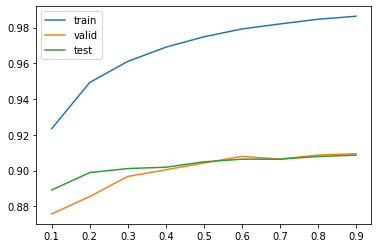

In [25]:
import matplotlib.pyplot as plt
import numpy as np
features_valid=[]
category_valid=[]
for corpora in corporas_valid:
    features_valid.append(corpora.get_feature())
    if corpora.get_category()=='b':
        category_valid.append(0)
    elif corpora.get_category()=='t':
        category_valid.append(1)
    elif corpora.get_category()=='e':
        category_valid.append(2)
    elif corpora.get_category()=='m':
        category_valid.append(3)
lr_list=[]
c_list=np.arange(0.1,1,0.1)
for c in c_list:
  lr_num=LogisticRegression(C=c,max_iter=1000)
  lr_num.fit(features_train,category_train)
  lr_list.append(lr_num)
train_list =[]
valid_list=[]
test_list=[]
for lr_num in lr_list:
  train_list.append(skm.accuracy_score(category_train,lr_num.predict(features_train)))
for lr_num in lr_list:
  valid_list.append(skm.accuracy_score(category_valid,lr_num.predict(features_valid)))
for lr_num in lr_list:
  test_list.append(skm.accuracy_score(category_test,lr_num.predict(features_test)))

plt.plot(c_list,train_list, label='train')
plt.plot(c_list,valid_list, label='valid')
plt.plot(c_list,test_list, label="test")
plt.legend()
plt.show()


## 問題59

初期の正解率

In [26]:
print(skm.accuracy_score(category_test,lr.predict(features_test)))

0.9086142322097378


tol(許容誤差)と正解率

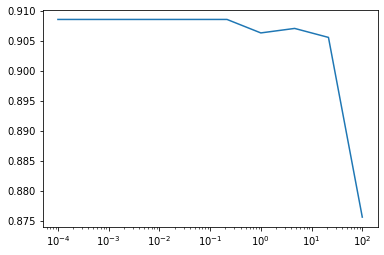

In [33]:
lr_tols=[]
test_list=[]
tols=np.logspace(-4,2,10)
for i in tols:
  lr_tol=LogisticRegression(tol=i,max_iter=10000)
  lr_tol.fit(features_train,category_train)
  lr_tols.append(lr_tol)
for lr_tol in lr_tols:
  test_list.append(skm.accuracy_score(category_test,lr_tol.predict(features_test)))

plt.plot(tols,test_list, label="tol")
plt.xscale('log')
plt.show()

solver(探索方法)と正解率

<BarContainer object of 5 artists>

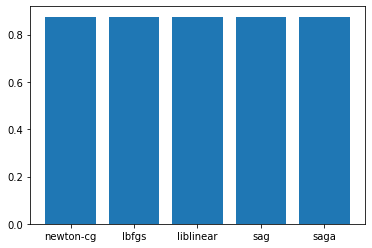

In [36]:
lr_solvers=[]
test_list=[]
solvers=['newton-cg','lbfgs','liblinear','sag','saga'
for i in solvers:
  lr_solver=LogisticRegression(solver=i,max_iter=1000)
  lr_solver.fit(features_train,category_train)
  lr_solvers.append(lr_tol)
for lr_solver in lr_solvers:
  test_list.append(skm.accuracy_score(category_test,lr_solver.predict(features_test)))
plt.bar(solvers,test_list, label="solver")

In [38]:
for solver,score in zip(solvers,test_list):
  print(solver+':'+str(score))

newton-cg:0.8756554307116104
lbfgs:0.8756554307116104
liblinear:0.8756554307116104
sag:0.8756554307116104
saga:0.8756554307116104


別のアルゴリズムを考えていく

LinearSVC

In [0]:
from sklearn.svm import LinearSVC

In [47]:
lsvc=LinearSVC()
lsvc.fit(features_train,category_train)
print(skm.accuracy_score(category_test,lsvc.predict(features_test)))

0.9048689138576779


ナイーブベイズ

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
nb=MultinomialNB()
nb.fit(features_train,category_train)
print(skm.accuracy_score(category_test,nb.predict(features_test)))

0.8936329588014982


SGD classifier

In [0]:
from sklearn.linear_model import SGDClassifier

In [51]:
sgd=SGDClassifier()
sgd.fit(features_train,category_train)
print(skm.accuracy_score(category_test,sgd.predict(features_test)))

0.9078651685393259


何故か結果が良い